<a href="https://colab.research.google.com/github/ArthurSilva707/Desafio_Cientista_de_Dados/blob/main/Desafio_Cientista_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados
dados = pd.read_csv('/content/teste_indicium_precificacao.csv')


In [ ]:
dados.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [ ]:
# Estatísticas descritivas
print(dados.describe())

                 id       host_id      latitude     longitude         price  \
count  4.889400e+04  4.889400e+04  48894.000000  48894.000000  48894.000000   
mean   1.901753e+07  6.762139e+07     40.728951    -73.952169    152.720763   
std    1.098288e+07  7.861118e+07      0.054529      0.046157    240.156625   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.472371e+06  7.822737e+06     40.690100    -73.983070     69.000000   
50%    1.967743e+07  3.079553e+07     40.723075    -73.955680    106.000000   
75%    2.915225e+07  1.074344e+08     40.763117    -73.936273    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimo_noites  numero_de_reviews  reviews_por_mes  \
count   48894.000000       48894.000000     38842.000000   
mean        7.030085          23.274758         1.373251   
std        20.510741          44.550991         1.680453   
min         1.000000           0.000000         

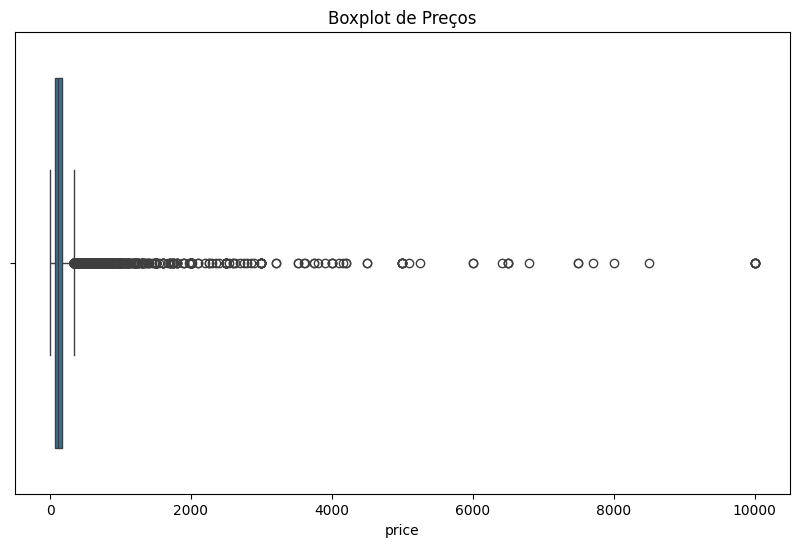

In [ ]:
# Gráfico para identificar outliers relacionados a variável preço
plt.figure(figsize=(10, 6))
sns.boxplot(x=dados['price'])
plt.title('Boxplot de Preços')
plt.show()


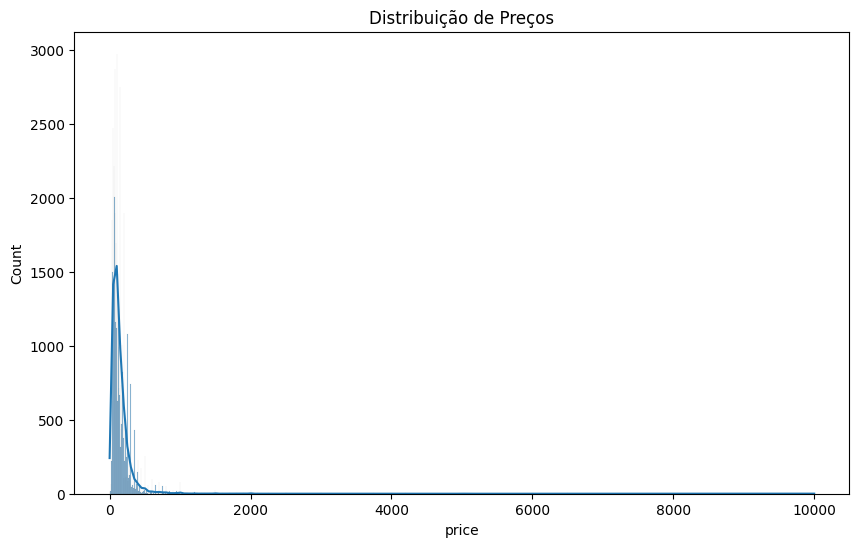

In [ ]:
# Visualizar distribuição de preços
plt.figure(figsize=(10, 6))
sns.histplot(dados['price'], kde=True)
plt.title('Distribuição de Preços')
plt.show()

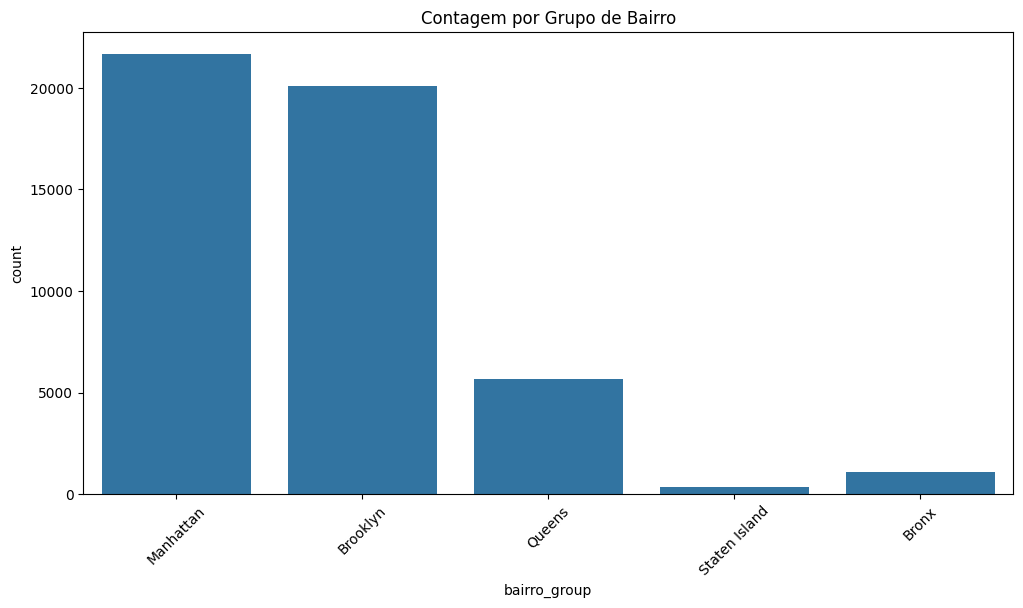

In [ ]:
# Gráfico para identificar quantidade de grupos por bairros
plt.figure(figsize=(12, 6))
sns.countplot(x=dados['bairro_group'])
plt.title('Contagem por Grupo de Bairro')
plt.xticks(rotation=45)
plt.show()


<ipython-input-8-4777e6d77356>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacoes = dados.corr()


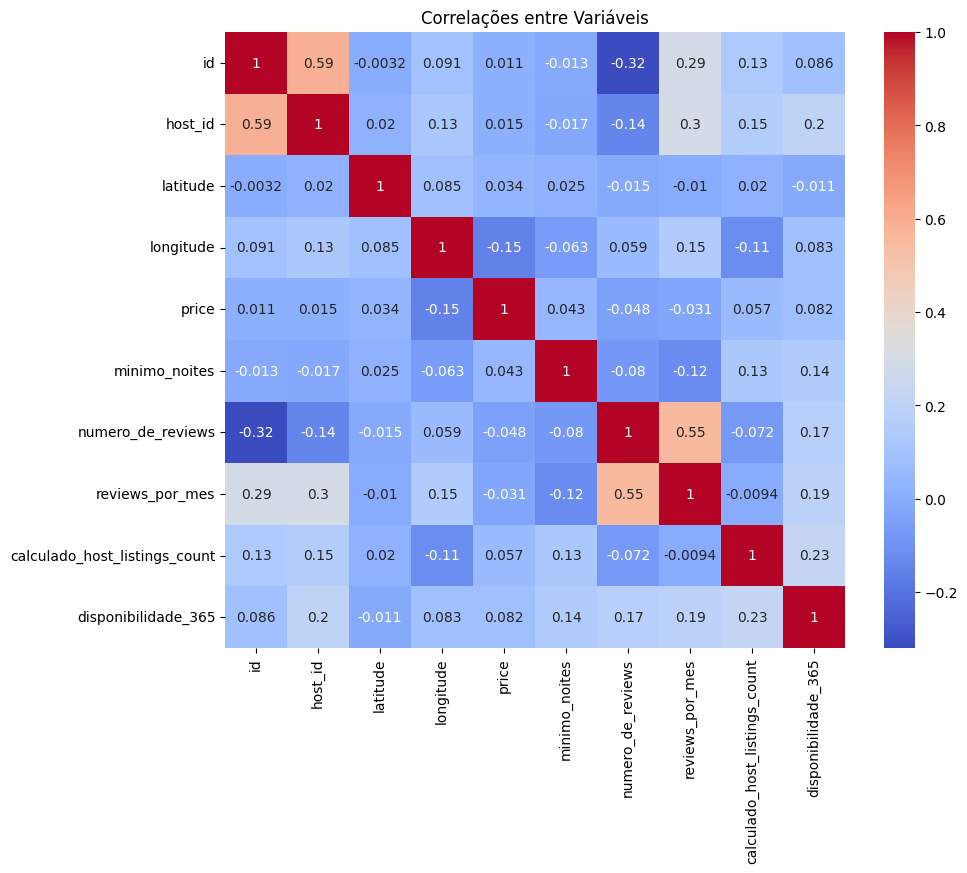

In [ ]:
# Correlações
correlacoes = dados.corr()

# Criar um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm')
plt.title('Correlações entre Variáveis')
plt.show()


In [ ]:
# Identificando todos os valores únicos no grupo de bairros
valores_unicos = dados['bairro_group'].unique()
print(valores_unicos)


['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']


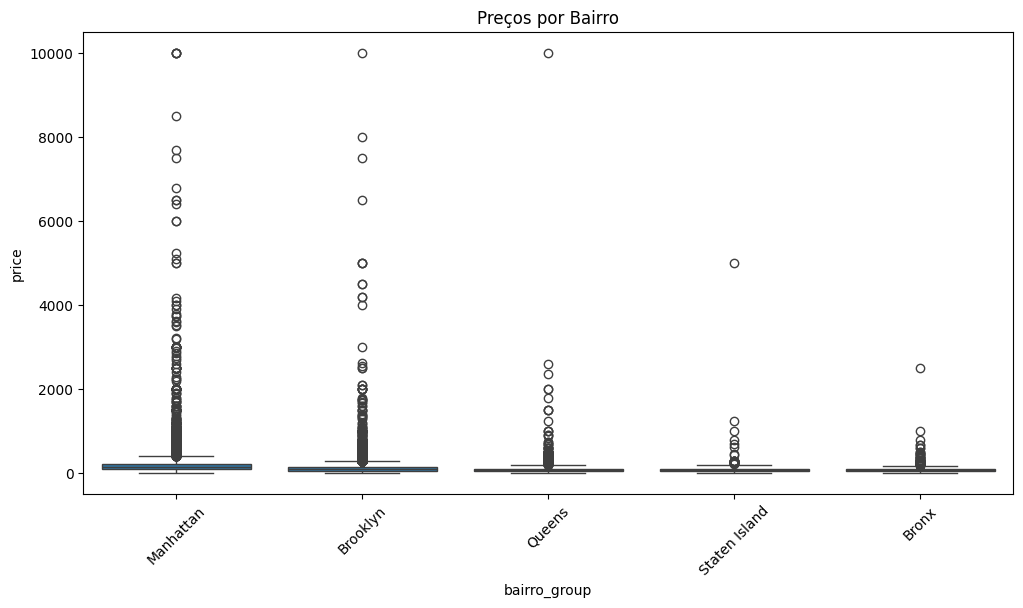

In [ ]:
# Explorando relações com variáveis categóricas
plt.figure(figsize=(12, 6))
sns.boxplot(x='bairro_group', y='price', data=dados)
plt.title('Preços por Bairro')
plt.xticks(rotation=45)
plt.show()

<ipython-input-11-9c63a1ed4358>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bairro_group', y='price', data=preco_medio_por_bairro, palette='viridis')


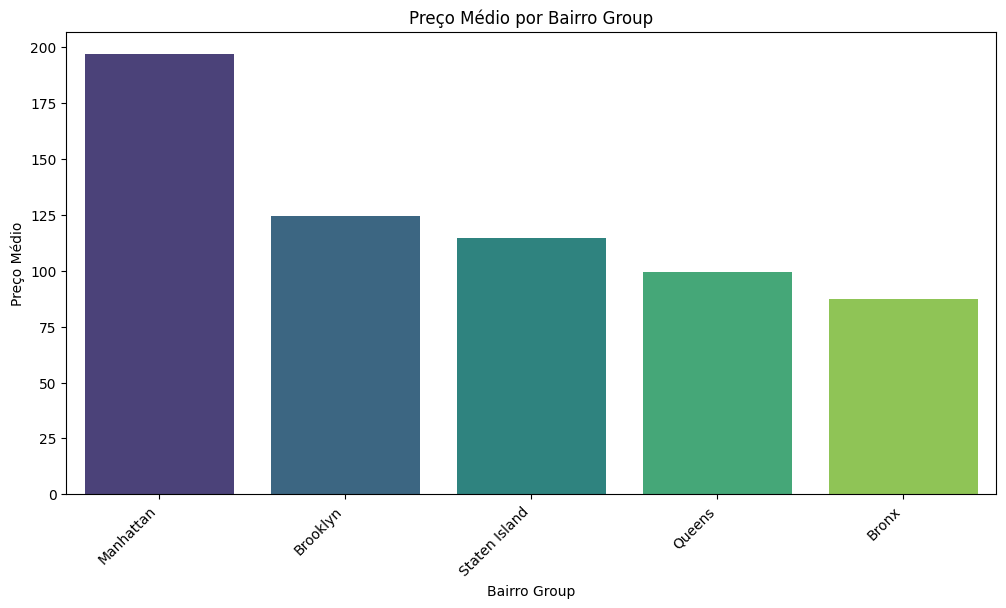

In [ ]:
# Calculando o preço médio para cada 'bairro_group'
preco_medio_por_bairro = dados.groupby('bairro_group')['price'].mean().reset_index()

# Ordenando os dados pelo preço médio
preco_medio_por_bairro = preco_medio_por_bairro.sort_values(by='price', ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='bairro_group', y='price', data=preco_medio_por_bairro, palette='viridis')
plt.title('Preço Médio por Bairro Group')
plt.xlabel('Bairro Group')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45, ha='right')
plt.show()


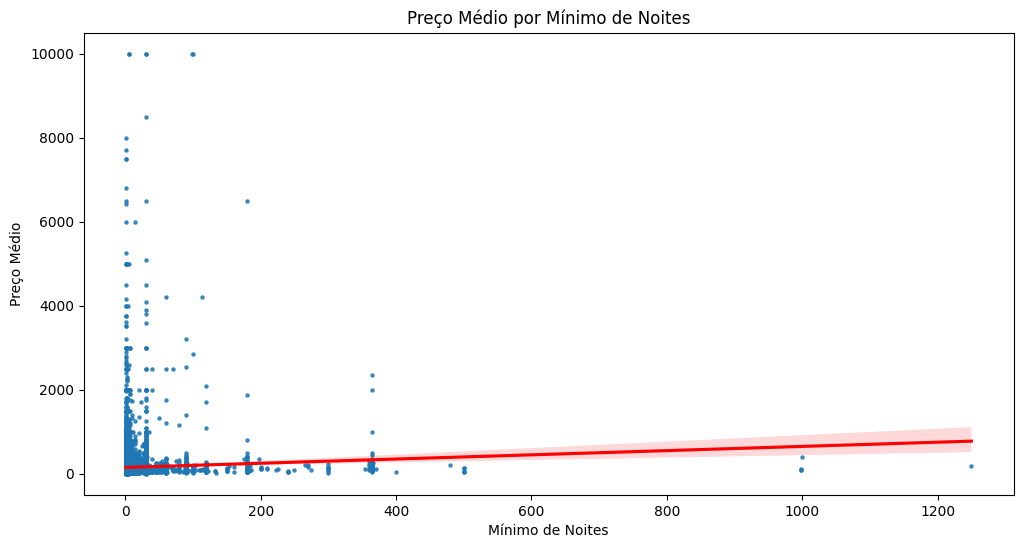

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cria o gráfico de dispersão com linha de tendência
plt.figure(figsize=(12, 6))
sns.regplot(x='minimo_noites', y='price', data=dados, scatter_kws={'s': 5}, line_kws={'color': 'red'})
plt.title('Preço Médio por Mínimo de Noites')
plt.xlabel('Mínimo de Noites')
plt.ylabel('Preço Médio')
plt.show()


In [ ]:
missing_values = dados.isnull().sum()

# Número de válores faltantes em cada coluna
print(missing_values)

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


In [ ]:
# Eliminando linhas com valores faltantes
dados = dados.dropna()

In [ ]:
# Importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

In [ ]:
# Selecionar variáveis para modelagem
features = ['minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'disponibilidade_365']

# Dividir dados em treino e teste
X = dados[features]
y = dados['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Avaliar modelo
y_pred = modelo.predict(X_test)
erro = mean_squared_error(y_test, y_pred)
print(f'Erro Médio Quadrático: {erro}')

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')


# Salvar modelo
joblib.dump(modelo, 'modelo_previcao_preco.pkl')


Erro Médio Quadrático: 32567.080158913446
R²: 0.007911714754354593


['modelo_previcao_preco.pkl']

<Axes: ylabel='price'>

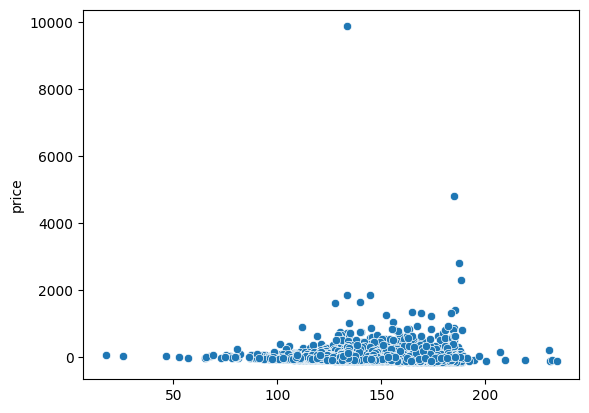

In [ ]:
# Identificando resíduos nos preços
import seaborn as sns

residuos = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuos)


In [ ]:
# Identificando preços maiores que 175 no grupo de bairros de Manhattan
linhas_mahattan_preco_maior_que_175 = dados[(dados['bairro_group'] == 'Manhattan') & (dados['price'] > 175)]

# Exibir a contagem de linhas
contagem_linhas = len(linhas_mahattan_preco_maior_que_175)
print(f'O número de linhas em Manhattan com preço maior que 175 é: {contagem_linhas}')


O número de linhas em Manhattan com preço maior que 175 é: 5790


In [ ]:
# Identificando preços maiores que 175 no bairro de Midtown
linhas_mahattan_preco_maior_que_175 = dados[(dados['bairro'] == 'Midtown') & (dados['price'] > 175)]

# Exibir a contagem de linhas
contagem_linhas = len(linhas_mahattan_preco_maior_que_175)
print(f'O número de linhas em Manhattan com preço maior que 175 é: {contagem_linhas}')


O número de linhas em Manhattan com preço maior que 175 é: 553


In [ ]:
# Identificando preços menores que 175 no grupo de bairros de Manhattan
linhas_mahattan_preco_maior_que_175 = dados[(dados['bairro_group'] == 'Manhattan') & (dados['price'] < 175)]

# Exibir a contagem de linhas
contagem_linhas = len(linhas_mahattan_preco_maior_que_175)
print(f'O número de linhas em Manhattan com preço maior que 175 é: {contagem_linhas}')


O número de linhas em Manhattan com preço maior que 175 é: 10489


In [ ]:
# Identificando preços menores que 175 no bairro de Midtown
linhas_mahattan_preco_maior_que_175 = dados[(dados['bairro'] == 'Midtown') & (dados['price'] < 175)]

# Exibir a contagem de linhas
contagem_linhas = len(linhas_mahattan_preco_maior_que_175)
print(f'O número de linhas em Manhattan com preço maior que 175 é: {contagem_linhas}')


O número de linhas em Manhattan com preço maior que 175 é: 413


In [ ]:
# Analisando Mamhhatam
linha_desejada = dados[(dados['bairro_group'] == 'Manhattan')]

# Exibir a linha desejada
linha_desejada


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48575,36318560,Luxury Sun-filled Private Room near Time Square,52917571,Linda Lou,Manhattan,Midtown,40.75286,-73.99297,Private room,120,2,1,2019-07-06,1.00,1,7
48600,36335990,Sunny Studio steps from Wall Street,269870940,Farina,Manhattan,Financial District,40.70603,-74.01084,Entire home/apt,75,1,1,2019-07-03,1.00,1,181
48633,36351128,"One bedroom without roomies, close to everything",273361532,David & Amy,Manhattan,Upper West Side,40.80281,-73.96550,Entire home/apt,110,3,2,2019-07-05,2.00,1,15
48731,36411407,Brand new 1 bedroom steps from Soho!,33917435,Mike,Manhattan,Lower East Side,40.71825,-73.99019,Entire home/apt,150,4,1,2019-07-06,1.00,1,13


In [ ]:
# Funcionamento do Modelo de Previsão
novo_apartamento = {'minimo_noites': 1, 'numero_de_reviews': 45, 'reviews_por_mes': 0.38, 'disponibilidade_365': 355}
preco_sugerido = modelo.predict([list(novo_apartamento.values())])[0]
print(f'Sugestão de Preço: ${preco_sugerido:.2f}')


Sugestão de Preço: $175.65


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<ipython-input-24-12a1bf6bab39>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_manhattan['categoria'] = pd.cut(dados_manhattan['price'], bins=[-float('inf'), 175, float('inf')], labels=['<175', '>=175'])


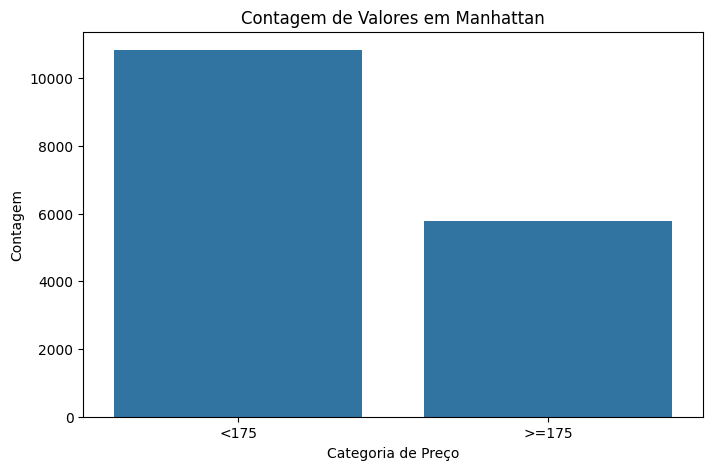

In [ ]:
dados_manhattan = dados[dados['bairro_group'] == 'Manhattan']

# Criando uma coluna 'categoria' com base no preço
dados_manhattan['categoria'] = pd.cut(dados_manhattan['price'], bins=[-float('inf'), 175, float('inf')], labels=['<175', '>=175'])

# Contar o número de valores em cada categoria
contagem_categorias = dados_manhattan['categoria'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=contagem_categorias.index, y=contagem_categorias.values)
plt.title('Contagem de Valores em Manhattan')
plt.xlabel('Categoria de Preço')
plt.ylabel('Contagem')
plt.show()

In [ ]:
dados.head(1)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
